In [96]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np 
from matplotlib import pyplot as plt 

from load_mnist import load_mnist 

In [2]:
# Loading training and testing data
xtrain, ytrain, xtest, ytest = load_mnist() 

In [19]:
# Get dimensions of training and testing data
M = ytrain.shape[1] 
p = xtrain.shape[1] 

ntrain = xtrain.shape[0] 
ntest = xtest.shape[0] 

In [28]:
# Converting training and testing data to torch tensors
xtra_torch = torch.tensor(xtrain) 
ytra_torch = torch.tensor(ytrain) 
xtes_torch = torch.tensor(xtest) 
ytes_torch = torch.tensor(ytest) 

In [91]:

xtra_torch.float()
xtra_torch

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
# Initializing weight tensor 

In [325]:
# 2-layer network 
# input (784) > hidden layer (100) + ReLU > softmax output (10)
# 4-layer network 
# input (784) > hidden layer (50) + ReLU > hidden layer (50) + ReLU > hidden layer (50) + ReLU > softmax output (10) 
# 1500 batch-size, 50 epochs, learning rate 0.8 
num_batch = 128 
num_epochs = 1
l_rate = 0.8 

In [326]:
training_data = TensorDataset(xtra_torch.float(), ytra_torch.float())
training_batch = DataLoader(training_data, shuffle = True, batch_size = num_batch)

testing_data = TensorDataset(xtes_torch, ytes_torch) 

In [327]:
# 2-layer network 
model_2L = nn.Sequential(nn.Linear(p, 100), nn.ReLU(), nn.Linear(100, M)) # use default weight initialization
model_4L = nn.Sequential(nn.Linear(p, 50), nn.ReLU(), nn.Linear(50, 50), nn.ReLU(), nn.Linear(50, 50), nn.ReLU(), nn.Linear(50, M)) # use default weight initialization
#model_2L[0].weight 

In [335]:
# Loss function
loss = F.cross_entropy 
lo = []
ac = []

In [336]:
# Optimizer
#sgd_optim = optim.SGD(two_L_model.parameters(), lr = l_rate) 
sgd_optim = optim.SGD(model_4L.parameters(), lr = l_rate) 

In [360]:
# Training the 2-layer network
for epoch in range(num_epochs): 
    #model_2L.train() 
    for xbatch, ybatch in training_batch:
        
        prediction = model_4L(xbatch) # 128 (mini-batch) by 10 
        
        ce_loss = loss(prediction, torch.argmax(ybatch, dim = 1)) 
        
        #ac.append((1/num_batch) * (torch.argmax(prediction, dim = 1) == torch.argmax(ybatch, dim = 1)))
        print(torch.argmax(prediction, dim = 1) == torch.argmax(ybatch, dim = 1).shape)
        
        l.append(ce_loss.item()) 
        
        ce_loss.backward() 
        sgd_optim.step() 
        sgd_optim.zero_grad() 
        
        #print("Epoch %s, iteration %s, loss %s" %(epoch, iteration, loss)) 

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

ValueError: only one element tensors can be converted to Python scalars

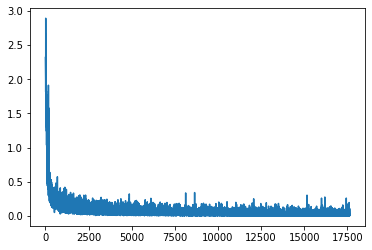

In [353]:
plt.figure(1)
plt.plot(l) 
plt.plot(ac)